In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os
from scipy.interpolate import interp1d

# Import the MFI library 
import MFI_lib2D as lib2
import MFI_class2D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})



The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class2D


### Compare Invernizzi error progression

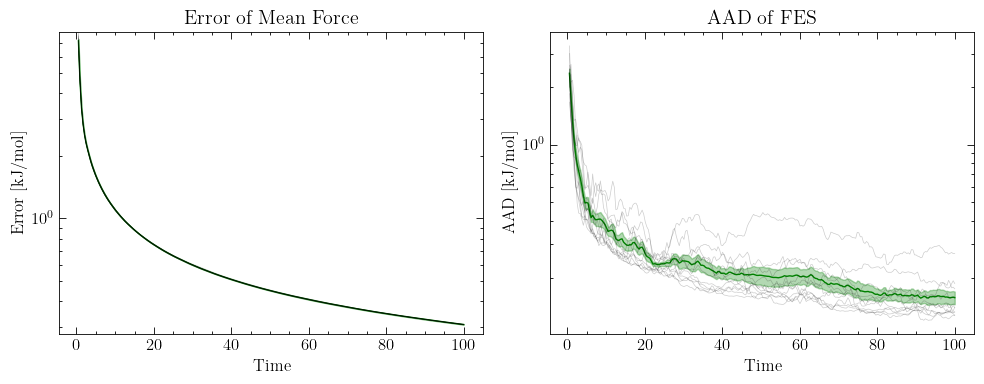

In [5]:
### Long simulations
path_long = path_notebook + "/_data_long/"
path_invernizzi = path_long + "Invernizzi_Potential/"

total_campaigns = 11
time_budget = 100

avr_prog = lib2.get_avr_error_prog(path_data=path_invernizzi, total_campaigns=total_campaigns, time_budget=time_budget, include_v=False, include_abs=False, simulation_type="long", show_plot=True, return_avr_prog=True)
t_long, ofe_mean_long, ofe_std_long, aad_mean_long, aad_std_long = avr_prog

lib2.save_pkl([t_long, ofe_mean_long, ofe_std_long, aad_mean_long, aad_std_long], path_notebook + f"/error_progressions/error_progression_long_inve.pkl")


#### Parallel Simulations

In [6]:
simulation_path = "/home/ucecabj/Desktop/MFI_Antoniu/MFI_class/simulation_longx4/"
os.chdir(simulation_path)

use_VNORM = True

err_collection = []
aad_collection = []

for i in range(25):
       
    force_terms_collection, time = [], []
    for ii in range(i*4 + 1, (i+1)*4+1):
        
        new_path = simulation_path + "simulation_" + str(ii) + "/"
        os.chdir(new_path)
        
        force_terms, Avr_Error_list, Maps_list, forces_e_list = lib1.load_pkl(f"MFI_data{ii}_20M.pkl")
        force_terms_collection.append(forces_e_list)
        time.append(np.array(Avr_Error_list)[:,0])
        
    ofe_prog, aad_prog = patch_and_error_prog_n_sim(grid, force_terms_collection, y=y, PD_cutoff=1, FES_cutoff=50, use_ST_ERR=True, use_VNORM=use_VNORM)  
    err_collection.append(ofe_prog)
    aad_collection.append(aad_prog)
    time = np.sum(time, axis=0)
    

[time_p, ofe_mean_p, ofe_ste_p, aad_mean_p, aad_ste_p] = lib1.get_mean_ste_of_n_error_prog(time, err_collection, aad_collection, plot=False, plot_log=True, plot_title=["Error of Mean Force", "AAD of FES"], plot_xlabel=["Time"], plot_ylabel=["Error [kJ/mol]","AAD [kJ/mol]"])


for i in range(len(err_collection)):         
    plt.subplot(1,2,1)
    plt.plot(time, err_collection[i], linewidth=0.5, alpha=0.2, color="black")
    plt.subplot(1,2,2)
    plt.plot(time, aad_collection[i], linewidth=0.5, alpha=0.2, color="black")    
    
plt.tight_layout(); plt.show()
print(f"AOFE: {ofe_mean_p[-1]},  AAD: {aad_mean_p[-1]}")


NameError: name 'lib1' is not defined

#### Single simulation with RTR (serial simulations)

AOFE: 0.4015593174322972,  AAD: 0.693556790144754


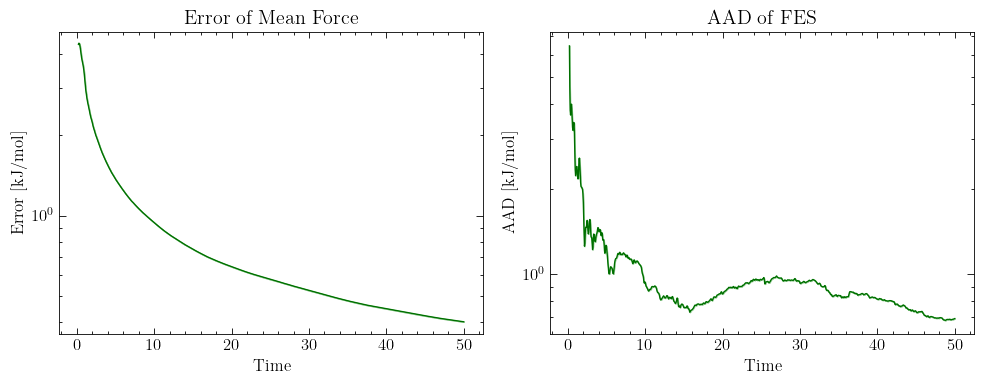

In [40]:
from scipy.interpolate import interp1d

path_SRTR = path_class + "SRTR/"
os.chdir(path_SRTR)

err_collection, aad_collection = [], []
time = np.linspace(0.2,50, 1000)

total_campaigns = 1
for i in range(1,total_campaigns+1):
        
    campaign_id = f"_inve_SRTR_{i}"
    force_terms, Avr_Error_list = lib2.load_pkl(path_SRTR+f"results_50ns{campaign_id}")
    [t_i,err_i, aad_i] = [Avr_Error_list[:,0], Avr_Error_list[:,2], Avr_Error_list[:,3]]
    
    aad_i = Avr_Error_list[:,3] / Avr_Error_list[:,1]
 
    #interpolate data to have the same time scale
    f = interp1d(t_i, err_i, kind='cubic')
    err_collection.append(f(time))
    
    f = interp1d(t_i, aad_i, kind='cubic')
    aad_collection.append(f(time))
    
[time, ofe_mean, ofe_ste, aad_mean, aad_ste] = lib2.get_mean_ste_of_n_error_prog(time, err_collection, aad_collection, plot=False, plot_log=True, plot_title=["Error of Mean Force", "AAD of FES"], plot_xlabel=["Time"], plot_ylabel=["Error [kJ/mol]","AAD [kJ/mol]"])
print(f"AOFE: {ofe_mean[-1]},  AAD: {aad_mean[-1]}")

for i in range(len(err_collection)):         
    plt.subplot(1,2,1); plt.plot(time, err_collection[i], linewidth=0.5, alpha=0.2, color="black")
    plt.subplot(1,2,2); plt.plot(time, aad_collection[i], linewidth=0.5, alpha=0.2, color="black")    

plt.tight_layout(); plt.show()

# time_PRTR, ofe_mean_PRTR, ofe_ste_PRTR, aad_mean_PRTR, aad_ste_PRTR = time, ofe_mean, ofe_ste, aad_mean, aad_ste    
time_SRTR, ofe_mean_SRTR, ofe_ste_SRTR, aad_mean_SRTR, aad_ste_SRTR = time, ofe_mean, ofe_ste, aad_mean, aad_ste


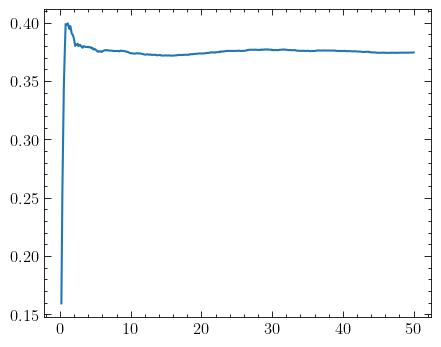

In [39]:
plt.plot(Avr_Error_list[:,0], Avr_Error_list[:,1])

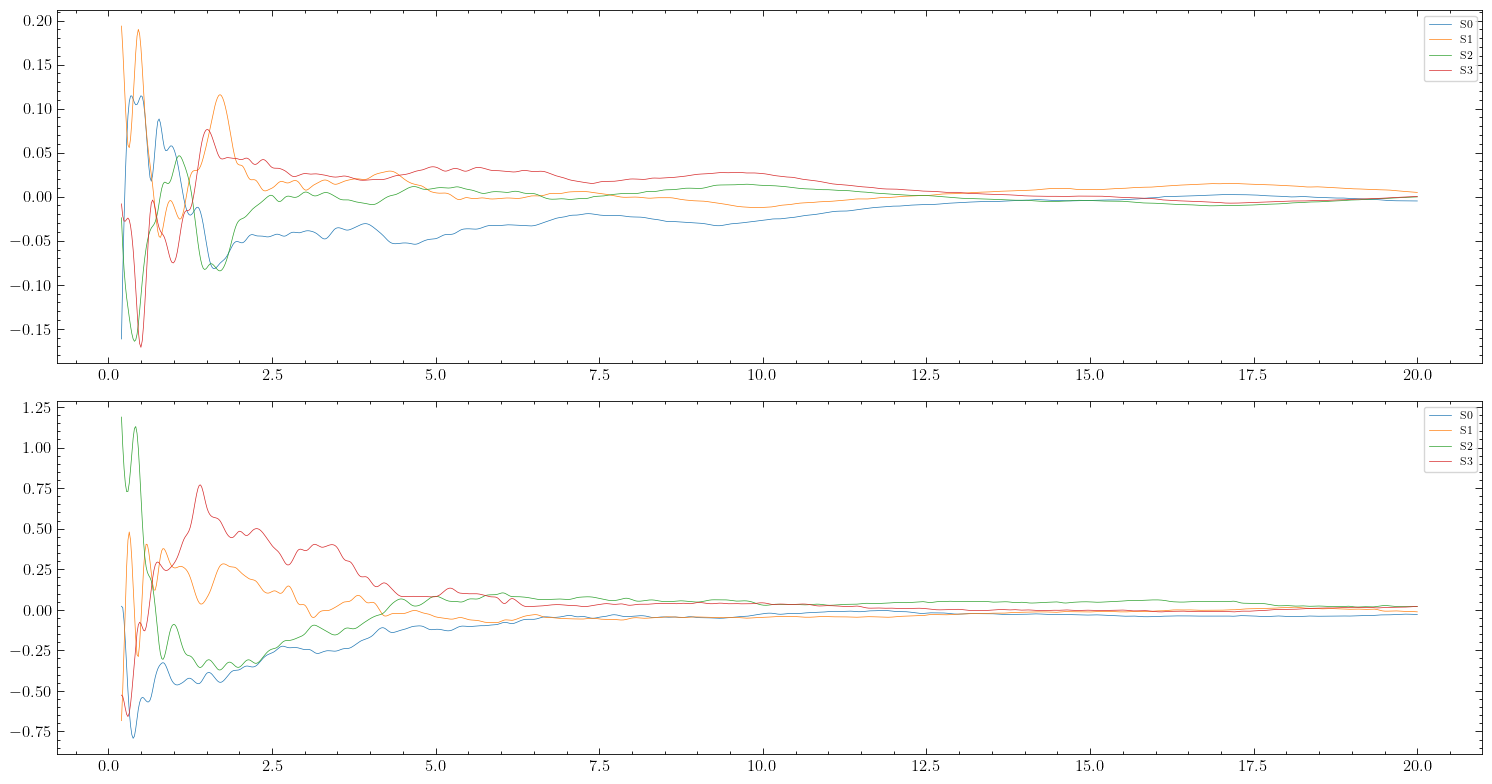

In [34]:
plt.figure(figsize=(15,8))
for i in range(len(err_collection)):         
    plt.subplot(2,1,1); plt.plot(time, err_collection[i] - ofe_mean, linewidth=0.5, label=f"S{i}")#, alpha=0.2, color="black")
    plt.subplot(2,1,2); plt.plot(time, aad_collection[i] - aad_mean, linewidth=0.5, label=f"S{i}")#, alpha=0.2, color="black")    

plt.subplot(2,1,1); plt.legend(fontsize=8)#; plt.xscale("log")#; plt.yscale("log")
plt.subplot(2,1,2); plt.legend(fontsize=8)#; plt.xscale("log")#; plt.yscale("log")
plt.tight_layout(); plt.show()

#### Parallel simulations with RTR

Total number of PRTR campaigns: 20 | min_time: 0 | max_time: 23.305
23.455000000000005
23.807500000000005
23.3575
23.755000000000003
23.657499999999995
23.652499999999996
23.310000000000002
23.305
23.555
23.457500000000007
25.157500000000002
28.060000000000002
26.152500000000003
28.105
25.259999999999998
25.504999999999995
27.705000000000005
26.055
26.302500000000002
26.555
Total number of PRTR campaigns: 20 | AOFE: 0.6327661362552571 | AAD: 0.2560821807280525


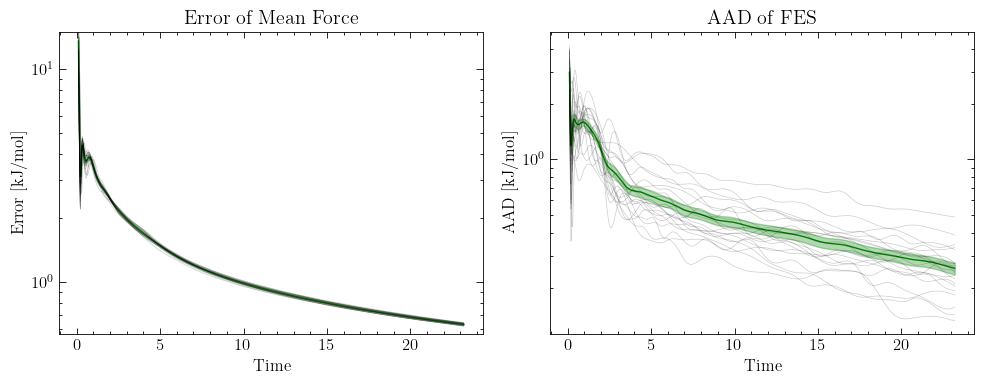

In [12]:
from scipy.interpolate import interp1d

path_PRTR = path_class + "PRTR/"
os.chdir(path_PRTR)

min_time, max_time, max_camp, total_campaigns = 0, 25, 100, 0
for i in range(1,max_camp+1):
    if os.path.isfile(path_PRTR+f"results_20ns_inve2_PRTR_{i}"):
        total_campaigns += 1
        time_i = lib2.load_pkl(path_PRTR+f"results_20ns_inve2_PRTR_{i}")[1][:,0]
        min_time, max_time = max(min_time, min(time_i)) , min(max_time, max(time_i))
    else: break
    
print(f"Total number of PRTR campaigns: {total_campaigns} | min_time: {min_time} | max_time: {max_time}")
# min_time, max_time, total_campaigns = 0.1, 23, 14
time = np.linspace(min_time + 0.1, max_time - 0.1, 1000)
err_collection = []; aad_collection = []

for i in range(1,total_campaigns+1):
    
    # campaign_id = f"_inve2_PRTR_{i}"
    force_terms, Avr_Error_list = lib2.load_pkl(path_PRTR+f"results_20ns_inve2_PRTR_{i}")
    [t_i,err_i, aad_i] = [list(Avr_Error_list[:,0]), list(Avr_Error_list[:,2]), list(Avr_Error_list[:,3])]
    print(max(t_i))
       
    #interpolate data to have the same time scale
    f = interp1d(t_i, err_i, kind='cubic')
    err_collection.append(f(time))
    
    f = interp1d(t_i, aad_i, kind='cubic')
    aad_collection.append(f(time))
    
[time, ofe_mean, ofe_ste, aad_mean, aad_ste] = lib2.get_mean_ste_of_n_error_prog(time, err_collection, aad_collection, plot=False, plot_log=True, plot_title=["Error of Mean Force", "AAD of FES"], plot_xlabel=["Time"], plot_ylabel=["Error [kJ/mol]","AAD [kJ/mol]"])
print(f"Total number of PRTR campaigns: {total_campaigns} | AOFE: {ofe_mean[-1]} | AAD: {aad_mean[-1]}")

for i in range(len(err_collection)):         
    plt.subplot(1,2,1); plt.plot(time, err_collection[i], linewidth=0.5, alpha=0.2, color="black")
    plt.subplot(1,2,2); plt.plot(time, aad_collection[i], linewidth=0.5, alpha=0.2, color="black")    

plt.tight_layout(); plt.show()
time_PRTR, ofe_mean_PRTR, ofe_ste_PRTR, aad_mean_PRTR, aad_ste_PRTR = time, ofe_mean, ofe_ste, aad_mean, aad_ste    


In [49]:
total_campaigns = 15
for i in range(1,total_campaigns+1):
    
    # campaign_id = f"_inve2_PRTR_{i}"
    force_terms, Avr_Error_list = lib2.load_pkl(path_PRTR+f"results_20ns_inve2_PRTR_{i}")
    [t_i,err_i, aad_i] = [list(Avr_Error_list[:,0]), list(Avr_Error_list[:,2]), list(Avr_Error_list[:,3])]
       
    #interpolate data to have the same time scale
    f = interp1d(t_i, err_i, kind='cubic')
    err_collection.append(f(time))
    
    f = interp1d(t_i, aad_i, kind='cubic')
    aad_collection.append(f(time))
    
    print(force_terms.shape)

(7, 6, 100, 100)
(7, 6, 100, 100)
(7, 6, 100, 100)
(7, 6, 100, 100)
(7, 6, 100, 100)
(7, 6, 100, 100)
(7, 6, 100, 100)
(7, 6, 100, 100)
(7, 6, 100, 100)
(7, 6, 100, 100)
(10, 6, 100, 100)
(10, 6, 100, 100)
(10, 6, 100, 100)
(10, 6, 100, 100)
(10, 6, 100, 100)


#### Compare all methods

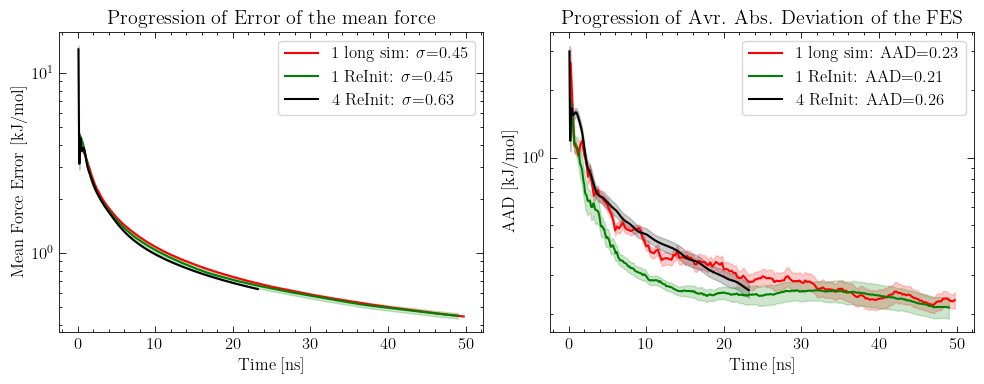

In [21]:
# [time_l, ofe_mean_l, ofe_ste_l, aad_mean_l, aad_ste_l] = lib1.load_pkl(path_class + "/error_progressions/error_progression_long")
# [time_p, ofe_mean_p, ofe_ste_p, aad_mean_p, aad_ste_p] = lib1.load_pkl(path_class + "/error_progressions/error_progression_x4"  )

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)  #############################################################

plt.plot(time_l, ofe_mean_l, color="red", label=f"1 long sim: $\sigma$={ofe_mean_l[-1]:.2f}")
plt.fill_between(time_l, ofe_mean_l-ofe_ste_l, ofe_mean_l+ofe_ste_l, color="red", alpha=0.2)

# plt.plot(time_p, ofe_mean_p, color="blue", label=f"4 long sim: $\sigma$={ofe_mean_p[-1]:.2f}")
# plt.fill_between(time_p, ofe_mean_p-ofe_ste_p, ofe_mean_p+ofe_ste_p, color="blue", alpha=0.2)

plt.plot(time_SRTR, ofe_mean_SRTR, color="green", label=f"1 ReInit: $\sigma$={ofe_mean_SRTR[-1]:.2f}")
plt.fill_between(time_SRTR, ofe_mean_SRTR-ofe_ste_SRTR, ofe_mean_SRTR+ofe_ste_SRTR, color="green", alpha=0.2)

plt.plot(time_PRTR, ofe_mean_PRTR, color="black", label=f"4 ReInit: $\sigma$={ofe_mean_PRTR[-1]:.2f}")
plt.fill_between(time_PRTR, ofe_mean_PRTR-ofe_ste_PRTR, ofe_mean_PRTR+ofe_ste_PRTR, color="black", alpha=0.2)

plt.title("Progression of Error of the mean force"); plt.xlabel("Time [ns]"); plt.ylabel("Mean Force Error [kJ/mol]"); 
plt.yscale("log")
# plt.ylim(0.4, 4)
plt.legend()



plt.subplot(1,2,2) #############################################################

plt.plot(time_l, aad_mean_l, color="red", label=f"1 long sim: AAD={aad_mean_l[-1]:.2f}")
plt.fill_between(time_l, aad_mean_l-aad_ste_l, aad_mean_l+aad_ste_l, color="red", alpha=0.2)

# plt.plot(time_p, aad_mean_p, color="blue", label=f"4 long sim:  AAD={aad_mean_p[-1]:.2f}")
# plt.fill_between(time_p, aad_mean_p-aad_ste_p, aad_mean_p+aad_ste_p, color="blue", alpha=0.2)
# plt.axhline(y=aad_mean_p[-1], color="blue", linestyle="--", linewidth=0.5, alpha=0.5)

plt.plot(time_SRTR, aad_mean_SRTR, color="green", label=f"1 ReInit: AAD={aad_mean_SRTR[-1]:.2f}")
plt.fill_between(time_SRTR, aad_mean_SRTR-aad_ste_SRTR, aad_mean_SRTR+aad_ste_SRTR, color="green", alpha=0.2)

plt.plot(time_PRTR, aad_mean_PRTR, color="black", label=f"4 ReInit: AAD={aad_mean_PRTR[-1]:.2f}")
plt.fill_between(time_PRTR, aad_mean_PRTR-aad_ste_PRTR, aad_mean_PRTR+aad_ste_PRTR, color="black", alpha=0.2)

plt.title("Progression of Avr. Abs. Deviation of the FES"); plt.xlabel("Time [ns]"); plt.ylabel("AAD [kJ/mol]"); 
plt.yscale("log")
# plt.ylim(0.1, 2)


plt.legend()
plt.tight_layout(); plt.show()

In [5]:
lib2.save_pkl([time_l, ofe_mean_l, ofe_ste_l, aad_mean_l, aad_ste_l], path_class + "inve_error_progression_long")
# lib1.save_pkl([time_p, ofe_mean_p, ofe_ste_p, aad_mean_p, aad_ste_p], path_class + "/error_progressions/error_progression_x4"  )
lib2.save_pkl([time_SRTR, ofe_mean_SRTR, ofe_ste_SRTR, aad_mean_SRTR, aad_ste_SRTR], path_class + "inve_error_progression_SRTR")
# lib1.save_pkl([time_PRTR, ofe_mean_PRTR, ofe_ste_PRTR, aad_mean_PRTR, aad_ste_PRTR], path_class + "/error_progressions/error_progression_PRTR")

In [15]:
print(f"AAD Long = {aad_mean_l[-1]}")
print(f"AAD x4   = {aad_mean_p[-1]}")
print(f"AAD SRTR = {aad_mean_SRTR[-1]}")
print(f"AAD PRTR = {aad_mean_PRTR[-1]}")

AAD Long = 0.05910364007368896
AAD x4   = 0.11042079120012473
AAD SRTR = 0.05210359776865955
AAD PRTR = 0.12871617528864265
